In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox
import cv2

In [4]:
from skimage import color
import pandas as pd 
from skimage import io

In [5]:
path = "data/images/win/10/2575964.jpg"
img = cv2.imread(path)
img.shape

(400, 400, 3)

In [6]:
dim = (64,64)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized.shape

(64, 64, 3)

In [7]:
ath = "C:\darsh\Research Internship\data\milan\loss\10\2575986.jpg"

In [8]:

# Opens a image in RGB mode
im = Image.open(ath)
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
left = 87
top = 78
right = 578
bottom = 568
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.show()

AttributeError: type object 'Image' has no attribute 'open'

In [39]:
input = "data/images/win/10/2575973.jpg"
output = "data/images/croped/win/10/2575964.jpg"

In [35]:
def cropimage(imgpath):
    im = Image.open(imgpath)
    width, height = im.size
    
    left = 87
    right = 578
    top = 78
    bottom = 568
    
    cimg = im.crop((left, top, right, bottom))
    
    cimg = cimg.save(imgpath)

In [40]:
cropimage(input)

In [124]:
a = 10
while a <= 90:
    number = str(a)
    imgpath = "data/images/loss/" + number + "/2576295.jpg"
    cropimage(imgpath)
    a = a + 10

In [94]:
traindata = np.array()

TypeError: array() missing required argument 'object' (pos 0)

In [127]:
frames = []
a = 10
while a <= 90:
    number = str(a)
    imgpath = "data/images/loss/" + number + "/2576295.jpg"
    image = cv2.imread(imgpath)
    frames.append(image)
    a = a + 10
traindata.append(frames)

In [128]:
len(traindata)

33

In [95]:
arr = [1,2,3,4,5,6]

newarr = np.array(arr)

In [96]:
type(newarr)

numpy.ndarray

In [129]:
temp = traindata

In [162]:
np.save("traindata", traindata)

In [163]:
temp1 = np.load("traindata.npy")
temp1.shape

(33, 9, 490, 491, 3)

In [130]:
len(temp)

33

In [131]:
for i in range(len(traindata)):
    traindata[i] = np.array(traindata[i])

In [132]:
traindata[0].shape

(9, 490, 491, 3)

In [133]:
traindata = np.array(traindata)

In [134]:
traindata.shape

(33, 9, 490, 491, 3)

In [4]:
traindata = np.load("traindata.npy")
traindata.shape

(33, 9, 490, 491, 3)

In [19]:
len(traindata)

33

In [27]:
newdata = []

In [77]:
traindata[0][0][0][0]

array([32,  0, 20], dtype=uint8)

In [76]:
newdata[0][0][0][0]

10

In [75]:
np.save("newdata", newdata)

In [3]:
newdata = np.load("newdata.npy")
newdata.shape

(33, 9, 490, 491)

()

In [9]:
datathree[0][0].shape

(490, 491, 1)

In [10]:
datafour = []
for i in range(len(datathree)):
    data = []
    for j in range(len(datathree[i])):
        
        temp = cv2.resize(datathree[i][j], dim, interpolation = cv2.INTER_AREA)
        
        data.append(temp)
    datafour.append(data)
            

In [15]:
for i in range(len(datafour)):
    datafour[i] = np.array(datafour[i])

In [16]:
datafour = np.array(datafour)

In [17]:
datafour.shape

(33, 9, 64, 64)

In [35]:
np.save("datathree", datathree)

In [3]:
datathree = np.load("datathree.npy")

In [23]:
a = []
for i in range(len(datafour)):
    e = []
    for j in range(len(datafour[i])):
        d = []
        for k in range(len(datafour[i][j])):
            f = []
            for l in range(len(datafour[i][j][k])):
                temp = datafour[i][j][k][l]
                l = []
                l.append(temp)
                f.append(l)
            d.append(f)
        e.append(d)
    a.append(e)  

In [32]:

for i in range(len(datafour)):
    for j in range(len(datafour[i])):
        for k in range(len(datafour[i][j])):
            for l in range(len(datafour[i][j][k])):
                a[i][j][k][l] = np.array(a[i][j][k][l])
            a[i][j][k] = np.array(a[i][j][k])
        a[i][j] = np.array(a[i][j])
    a[i] = np.array(a[i])
a = np.array(a)

In [33]:
a.shape

(33, 9, 64, 64, 1)

In [34]:
np.save("a", a)

In [31]:
type(a[0][0][0][0])

list

In [21]:
len(temp1[0])

1

In [31]:
newdata = np.array(newdata)

In [6]:
datathree = np.load("datathree.npy")
datathree.shape

(33, 9, 490, 491, 1)

In [7]:
for i in range(len(datathree)):
    for j in range(len(datathree[i])):
        datathree[i][j] = cv2.resize(datathree[i][j], dim, interpolation = cv2.INTER_AREA)

ValueError: could not broadcast input array from shape (64,64) into shape (490,491,1)

In [35]:
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :, :]
    y = data[:, 1 : data.shape[1], :, :, :]
    return x, y

In [36]:
indexes = np.arange(a.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.9 * a.shape[0])]
val_index = indexes[int(0.9 * a.shape[0]) :]
train_dataset = a[train_index]
val_dataset = a[val_index]

In [37]:
train_dataset.shape

(29, 9, 64, 64, 1)

In [38]:
val_dataset.shape

(4, 9, 64, 64, 1)

In [39]:
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

In [40]:
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (29, 8, 64, 64, 1), (29, 8, 64, 64, 1)
Validation Dataset Shapes: (4, 8, 64, 64, 1), (4, 8, 64, 64, 1)


In [41]:
x_train = x_train/255
y_train = y_train/255
x_val = x_val/255
y_val = y_val/255

In [42]:
x_train.shape

(29, 8, 64, 64, 1)

In [43]:
x_train[0][0][0][0]

array([0.26666667])

In [45]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [46]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/20
6/6 [==============================] - 57s 9s/step - loss: 0.6562 - val_loss: 0.6922 - lr: 0.0010
Epoch 2/20
6/6 [==============================] - 48s 8s/step - loss: 0.6389 - val_loss: 0.6912 - lr: 0.0010
Epoch 3/20
6/6 [==============================] - 49s 8s/step - loss: 0.6294 - val_loss: 0.6907 - lr: 0.0010
Epoch 4/20
6/6 [==============================] - 49s 8s/step - loss: 0.6251 - val_loss: 0.6902 - lr: 0.0010
Epoch 5/20
6/6 [==============================] - 48s 8s/step - loss: 0.6235 - val_loss: 0.6895 - lr: 0.0010
Epoch 6/20
6/6 [==============================] - 48s 8s/step - loss: 0.6225 - val_loss: 0.6890 - lr: 0.0010
Epoch 7/20
6/6 [==============================] - 48s 8s/step - loss: 0.6216 - val_loss: 0.6881 - lr: 0.0010
Epoch 8/20
6/6 [==============================] - 49s 8s/step - loss: 0.6213 - val_loss: 0.6873 - lr: 0.0010
Epoch 9/20
6/6 [==============================] - 49s 8s/step - loss: 0.6210 - val_loss: 0.6868 - lr: 0.0010
Epoch 10/20
6/6 [==

In [52]:
acc = model.predict(x_val)

1/1 [==============================] - 1s 830ms/step


In [55]:
y_true = []
y_pred = []
y_true.append(y_val[0]) 
y_pred.append(acc[0])

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

ValueError: unknown is not supported

In [59]:
example = val_dataset[np.random.choice(range(len(val_dataset)), size=1)[0]]
example.shape

(9, 64, 64, 1)

In [60]:
frames = example[:10, ...]
frames.shape

(9, 64, 64, 1)

In [61]:
original_frames = example[10:, ...]
original_frames.shape

(0, 64, 64, 1)

1/1 [==============================] - 1s 1s/step


IndexError: index 0 is out of bounds for axis 0 with size 0

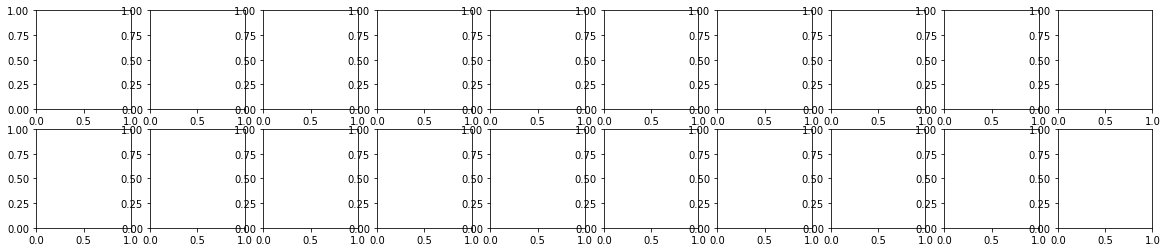

In [51]:
# Select a random example from the validation dataset.
example = val_dataset[np.random.choice(range(len(val_dataset)), size=1)[0]]

# Pick the first/last ten frames from the example.
frames = example[:10, ...]
original_frames = example[10:, ...]

# Predict a new set of 10 frames.
for _ in range(9):
    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Plot the new frames.
new_frames = frames[10:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Display the figure.
plt.show()

In [ ]:
e = pd.read_csv("data/events/events_European_Championship.json")

In [27]:
e= pd.read_json("data/events/events_World_Cup.json")


In [5]:
e.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],26010,"[{'y': 48, 'x': 50}, {'y': 50, 'x': 47}]",1694390,Pass,4418,1H,1.255990,85,88178642
1,8,Simple pass,[{'id': 1801}],3682,"[{'y': 50, 'x': 47}, {'y': 48, 'x': 41}]",1694390,Pass,4418,1H,2.351908,85,88178643
2,8,Simple pass,[{'id': 1801}],31528,"[{'y': 48, 'x': 41}, {'y': 35, 'x': 32}]",1694390,Pass,4418,1H,3.241028,85,88178644
3,8,High pass,[{'id': 1802}],7855,"[{'y': 35, 'x': 32}, {'y': 6, 'x': 89}]",1694390,Pass,4418,1H,6.033681,83,88178645
4,1,Ground defending duel,"[{'id': 702}, {'id': 1801}]",25437,"[{'y': 6, 'x': 89}, {'y': 0, 'x': 85}]",1694390,Duel,4418,1H,13.143591,12,88178646


In [8]:
time_event = e.loc[e['matchId'] == 3159]


In [9]:
time_event.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id


In [28]:
h = e["teamId"].unique()

In [11]:
print(d)

[ 4418 11944  8731  6697 14496 10682  2413 14358 10962 13869  3148 14622
  4687  9598  1598 11555  7047  8274  3757  5629  9109 10451  7839  9905]


In [14]:
print(a)

[ 1609  1631  1625  1651  1646  1610  1628  1673  1639  1623  1611  1633
  1624  1613 10531  1619  1644  1612  1627  1659]


In [17]:
print(b)

[ 3799  3772  3770  3776  3779  3766  3804  3771  3777  3785 19830  3780
  3787  3783  3789  3767  3775  3782  3795  3774]


In [20]:
print(c)

[2446 2444 2443 2482 2457 2445 2453 2462 2454 2463 2449 2975 2481 2450
 2455 2460 2447 2451]


In [23]:
print(f)

[3158 3172 3166 3185 3157 3197 3187 3194 3176 3161 3159 3173 3162 3204
 3164 3219 3193 3315 3165 3163]


In [26]:
print(g)

[682 695 687 692 698 678 756 679 691 680 701 683 676 684 675 677 674 714
 696 712]


In [29]:
print(h)

[16521 14358 15670 16129  1598  9905 16216 10840  8493  4418  7712 15594
  7839 12274 16823  9598  6380  6697 17322 16871 15473  3148 14855  7047
 17929  5629  2413 16276 19314 13869 12913 12430]
